### **REGRESSION MODELS**
by J. Daniel Velez

Here different regression models are tested

In [1]:
from f_filter_process import get_file, call_file, export_dataframe
from regression_models import*
import pandas as pd
import geopandas as gpd

In [5]:
# Function to import files
River_dict = call_file() 

2024-11-18 20:36:46.990 python[44675:1878938] +[IMKInputSession subclass]: chose IMKInputSession_Modern


##### Linear Regression
Args for the 'l_regression' function:
 * river (dict): Dictionary containing node data with 'width' and 'wse' keys.
 * min_spearman (float or None): Minimum Spearman correlation value to include a node in the plot.
                                 if None, no filtering is applied (default: None).
 * min_obs (int): Minimum number of observations required to display a scatter plot for a node (default: 10).
 * show_p_value (bool): If True, displays the p-value on each scatter plot (default: True).

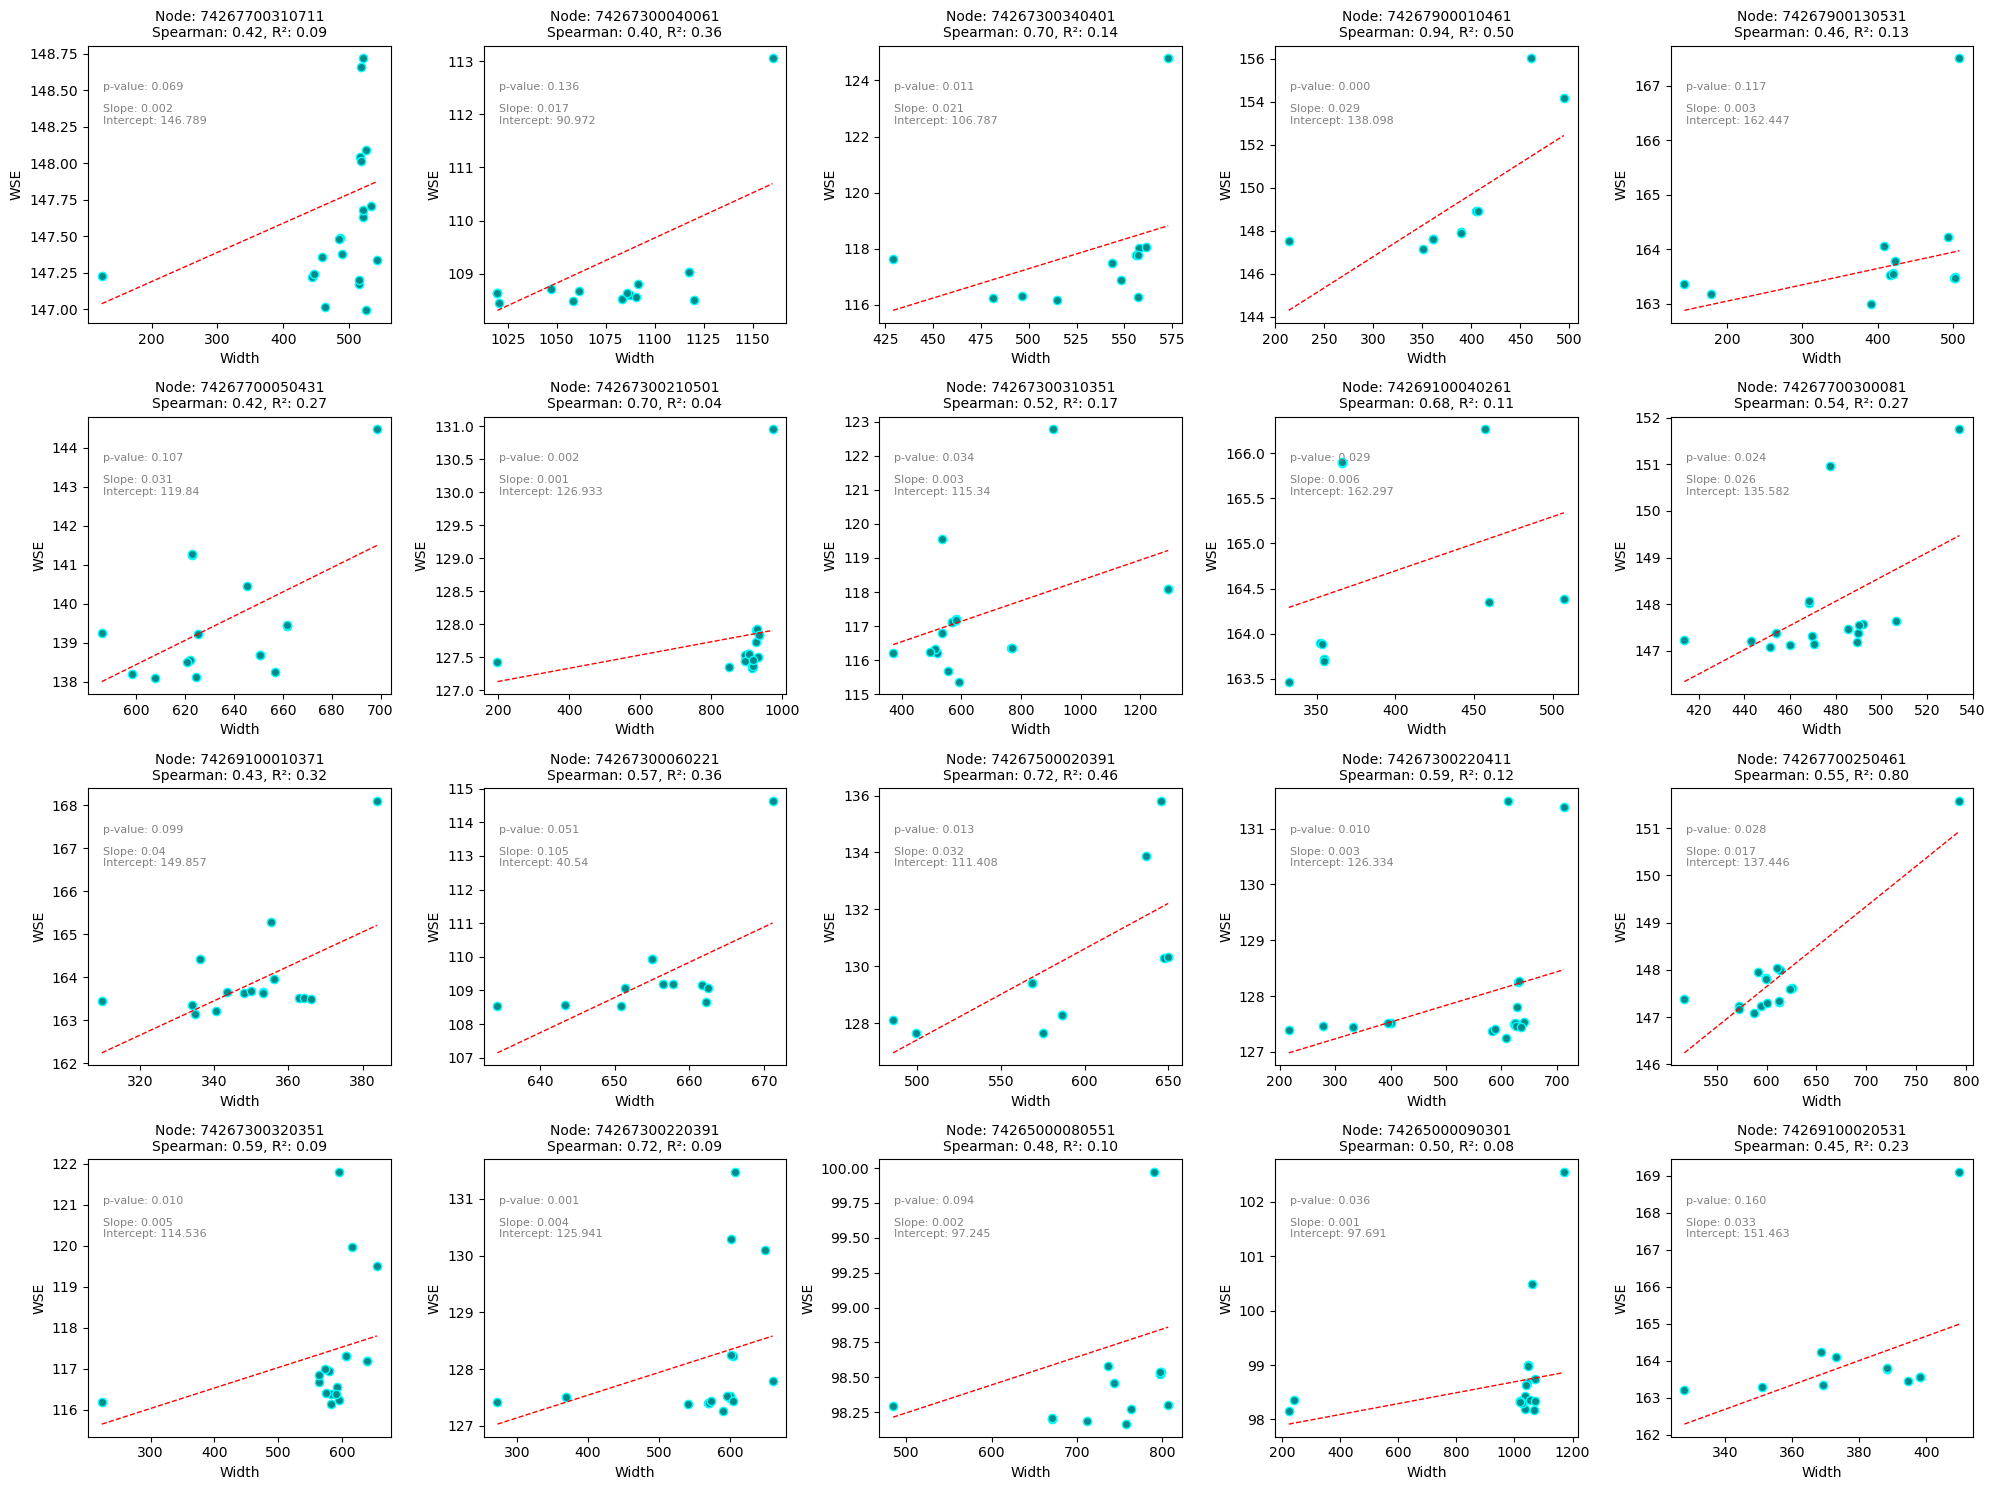

In [6]:
################## 1. Linear Regression ##################
linear_reg = l_regression(River_dict, min_spearman=0.4, min_obs=10, show_p_value=True)

In [7]:
linear_reg.rename(columns={'Node': 'node_id','Spearman': 'spearman_corr'}, inplace=True)
linear_reg

,node_id,spearman_corr,p_value,R2,Slope,Intercept
0,74267900080011,0.710,0.004,0.313,0.025,145.199
1,74267900080021,0.610,0.027,0.378,0.042,138.837
2,74267900080041,0.399,0.199,0.063,0.001,156.248
3,74267900080051,0.364,0.272,0.321,0.022,146.456
4,74267900080071,0.160,0.584,0.058,-0.014,164.156
...,...,...,...,...,...,...
4737,74269500200551,-0.309,0.385,0.410,-0.006,191.605
4738,74269500200611,0.552,0.098,0.195,0.001,189.045
4739,74269500200661,-0.079,0.829,0.006,0.000,189.395
4740,74269500220271,-0.473,0.142,0.216,-0.002,190.407


In [ ]:
export_dataframe(linear_reg,is_geodataframe=False)

In [8]:
river_gpkg = call_file()

In [9]:
## Define the common column used for merging, e.g., "id" (replace "id" with your actual column name)
common_column = "node_id"
#Merge the geodataframe with the dataframe
l_regression = river_gpkg.merge(linear_reg, on=common_column).T.drop_duplicates().T # Drop duplicate columns

In [10]:
#l_regression['geometry'] = gpd.GeoSeries.from_wkt(l_regression['geometry'])
l_regression = gpd.GeoDataFrame(l_regression, geometry='geometry', crs="EPSG:4326")
# Ensure Slope and Intercept are real numbers and round them to 3 decimals
l_regression['Slope'] = pd.to_numeric(l_regression['Slope'], errors='coerce').round(3).map(lambda x: f"{x:.3f}")
l_regression['Intercept'] = pd.to_numeric(l_regression['Intercept'], errors='coerce').round(3).map(lambda x: f"{x:.3f}")

In [ ]:
export_dataframe(l_regression,is_geodataframe=True)

In [11]:
l_regression

,node_id,time_str,lat,lon,river_name,wse,wse_u,width,width_u,node_dist,...,p_dist_out,spearman_corr_x,p_value_x,num_pairs,geometry,spearman_corr_y,p_value_y,R2,Slope,Intercept
0,74267900080011,2023-11-28T02:38:04Z,38.426895,-82.441978,Ohio River,156.52468,0.09389,500.977301,10.144776,42.381053,...,2757751.0,0.70989,0.004451,14,POINT (-82.44198 38.42689),0.71,0.004,0.313,0.025,145.199
1,74267900080011,2023-09-05T15:37:46Z,38.426962,-82.442006,Ohio River,156.53183,0.09207,479.32681,9.460699,49.867454,...,2757751.0,0.70989,0.004451,14,POINT (-82.44201 38.42696),0.71,0.004,0.313,0.025,145.199
2,74267900080011,2023-12-19T12:37:23Z,38.427898,-82.442313,Ohio River,156.37523,0.10694,439.811616,9.971181,74.649777,...,2757751.0,0.70989,0.004451,14,POINT (-82.44231 38.42790),0.71,0.004,0.313,0.025,145.199
3,74267900080011,2023-12-18T23:23:07Z,38.426999,-82.442021,Ohio River,156.58563,0.09433,498.237829,10.041295,42.644972,...,2757751.0,0.70989,0.004451,14,POINT (-82.44202 38.42700),0.71,0.004,0.313,0.025,145.199
4,74267900080011,2024-01-08T20:08:13Z,38.426971,-82.442006,Ohio River,156.87138,0.0937,498.147005,10.613672,56.860819,...,2757751.0,0.70989,0.004451,14,POINT (-82.44201 38.42697),0.71,0.004,0.313,0.025,145.199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69355,74269500230541,2024-01-19T07:45:16Z,39.995398,-80.738554,Ohio River,189.79191,0.09261,387.877859,9.410009,9.757731,...,3108576.0,0.733333,0.015801,10,POINT (-80.73855 39.99540),0.733,0.016,0.403,0.009,186.592
69356,74269500230541,2024-04-11T18:45:34Z,39.995439,-80.738637,Ohio River,190.72747,0.09363,395.545819,9.280869,3.9255,...,3108576.0,0.733333,0.015801,10,POINT (-80.73864 39.99544),0.733,0.016,0.403,0.009,186.592
69357,74269500230541,2024-03-21T22:00:29Z,39.995432,-80.738473,Ohio River,189.83382,0.09237,341.105428,8.914021,14.221748,...,3108576.0,0.733333,0.015801,10,POINT (-80.73847 39.99543),0.733,0.016,0.403,0.009,186.592
69358,74269500230541,2023-08-26T06:29:42Z,39.995358,-80.738755,Ohio River,189.76555,0.0924,394.787964,9.152209,15.231972,...,3108576.0,0.733333,0.015801,10,POINT (-80.73875 39.99536),0.733,0.016,0.403,0.009,186.592


In [14]:
l_reg_filtered = l_regression[l_regression['spearman_corr_y'] >= 0.4]
l_reg_filtered

,node_id,time_str,lat,lon,river_name,wse,wse_u,width,width_u,node_dist,...,p_dist_out,spearman_corr_x,p_value_x,num_pairs,geometry,spearman_corr_y,p_value_y,R2,Slope,Intercept
0,74267900080011,2023-11-28T02:38:04Z,38.426895,-82.441978,Ohio River,156.52468,0.09389,500.977301,10.144776,42.381053,...,2757751.0,0.70989,0.004451,14,POINT (-82.44198 38.42689),0.71,0.004,0.313,0.025,145.199
1,74267900080011,2023-09-05T15:37:46Z,38.426962,-82.442006,Ohio River,156.53183,0.09207,479.32681,9.460699,49.867454,...,2757751.0,0.70989,0.004451,14,POINT (-82.44201 38.42696),0.71,0.004,0.313,0.025,145.199
2,74267900080011,2023-12-19T12:37:23Z,38.427898,-82.442313,Ohio River,156.37523,0.10694,439.811616,9.971181,74.649777,...,2757751.0,0.70989,0.004451,14,POINT (-82.44231 38.42790),0.71,0.004,0.313,0.025,145.199
3,74267900080011,2023-12-18T23:23:07Z,38.426999,-82.442021,Ohio River,156.58563,0.09433,498.237829,10.041295,42.644972,...,2757751.0,0.70989,0.004451,14,POINT (-82.44202 38.42700),0.71,0.004,0.313,0.025,145.199
4,74267900080011,2024-01-08T20:08:13Z,38.426971,-82.442006,Ohio River,156.87138,0.0937,498.147005,10.613672,56.860819,...,2757751.0,0.70989,0.004451,14,POINT (-82.44201 38.42697),0.71,0.004,0.313,0.025,145.199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69355,74269500230541,2024-01-19T07:45:16Z,39.995398,-80.738554,Ohio River,189.79191,0.09261,387.877859,9.410009,9.757731,...,3108576.0,0.733333,0.015801,10,POINT (-80.73855 39.99540),0.733,0.016,0.403,0.009,186.592
69356,74269500230541,2024-04-11T18:45:34Z,39.995439,-80.738637,Ohio River,190.72747,0.09363,395.545819,9.280869,3.9255,...,3108576.0,0.733333,0.015801,10,POINT (-80.73864 39.99544),0.733,0.016,0.403,0.009,186.592
69357,74269500230541,2024-03-21T22:00:29Z,39.995432,-80.738473,Ohio River,189.83382,0.09237,341.105428,8.914021,14.221748,...,3108576.0,0.733333,0.015801,10,POINT (-80.73847 39.99543),0.733,0.016,0.403,0.009,186.592
69358,74269500230541,2023-08-26T06:29:42Z,39.995358,-80.738755,Ohio River,189.76555,0.0924,394.787964,9.152209,15.231972,...,3108576.0,0.733333,0.015801,10,POINT (-80.73875 39.99536),0.733,0.016,0.403,0.009,186.592


In [15]:
export_dataframe(l_reg_filtered,is_geodataframe=True)

2024-11-18 20:44:46.182 python[44675:1878938] The class 'NSSavePanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


GeoDataFrame has been exported as a GeoPackage to /Users/josele/Library/CloudStorage/GoogleDrive-ejdvc757@gmail.com/Other computers/My MacBook Pro/PhD/Dissertation/3_output/Ohio/Shps/No_Norm/8_bits/reg04.gpkg
